# **Case Study: Condition Monitoring of a Complex Hydraulic System**
The system under study consist of a primary working circuit (**a** in figure below) and a secundary circuit for cooling and filtration (**b** in figure below). This system was developed as a test rig allowing to change the state or condition of various components. [Paper available here](https://ieeexplore.ieee.org/document/7151267)

![picture](https://drive.google.com/uc?export=view&id=1Phrt8RMtkQ513iRafEY9rcsKvmszN9wh)

The given test system is equipped with **several sensors measuring process values** such as pressure (PS1-PS6), flow (FS1, FS2), temperature (TS1-TS5), electrical power (EPS1) and vibration (VS1). In addition, sensors for particle contamination (CS and MCS, COPS) and oil parameter monitoring (COPS) are integrated. 


The system cyclically repeats constant load cycles (duration 60 seconds) and measures process values **while the condition of four hydraulic components (cooler, valve, pump and accumulator) is quantitatively varied**. The dataset is available in the following [link](https://archive-beta.ics.uci.edu/dataset/447/condition+monitoring+of+hydraulic+systems).

# **Data Inspection**

The data has been collected from **17 sensors** (6 of pressure, 1 motor power, 2 volume flow, 4 temperature, 1 vibration, 1 cooling efficiency, 1 cooling power and 1 efficiency factor) over **2205 cycles** of 60 sec each (1.5 days). The sensors' sampling rate in different depending on the dynamics of the underlying physical values. The sensors involved with their respective unit of measure and samplig rate are reported in the Table below.


| Sensor | Physical quantity          | Unit  | Sampling rate |
|:--------|:---------------------------|:-------|:---------------|
| PS1    | Pressure                  | bar   | 100 Hz        |
| PS2    | Pressure                  | bar   | 100 Hz        |
| PS3    | Pressure                  | bar   | 100 Hz        |
| PS4    | Pressure                  | bar   | 100 Hz        |
| PS5    | Pressure                  | bar   | 100 Hz        |
| PS6    | Pressure                  | bar   | 100 Hz        |
| EPS1   | Motor power               | W     | 100 Hz        |
| FS1    | Volume flow               | l/min | 10 Hz         |
| FS2    | Volume flow               | l/min | 10 Hz         |
| TS1    | Temperature               | °C    | 1 Hz          |
| TS2    | Temperature               | °C    | 1 Hz          |
| TS3    | Temperature               | °C    | 1 Hz          |
| TS4    | Temperature               | °C    | 1 Hz          |
| VS1    | Vibration                 | mm/s  | 1 Hz          |
| CE     | Cooling efficiency (virtual) | %    | 1 Hz          |
| CP     | Cooling power (virtual)   | kW    | 1 Hz          |
| SE     | Efficiency factor         | %     | 1 Hz          |

The raw process sensors output is provided in separate dedicated files (one file per sensor). Each file is structured as a matrix (tab-delimited) with the rows representing the cycles and the columns the data samples within a cycle.

In order to simulate different scenarios, from normal functioning to faults of different severities, especific parameters of some components are configurable. In the following table are listed the configurable components and the respective controllable parameter.

| |Component  |Condition              |Control Parameter    |
|:-:|:-----------|:-----------------------|:---------------------|
|1|Cooler (C1)| Cooling power decrease| Fan duty cycle of C1|
|2|Valve (V10)| Switching characteristic degradation| Control current of V10|
|3|Pump (MP1)| Internal leakage|Switchable bypass orifices (V9)|
|4|Accumulators (A1-A4)| Gas leakage| Accumulators A1-A4 with different precharge pressure|

The condition of each component cycle-wise is provided in the file ```profile.txt```. ```profile.txt``` contains a matrix whose rows represent the cycles (2205), all columns but number 5 are the condition of each component and the last column is a flag indicating if stady state is reached or not. The columns order and entries are read in the following way:

1. **Cooler condition** (%):
	* 3: close to total failure
	* 20: reduced effifiency
	* 100: full efficiency

2. **Valve condition** (%):
	* 100: optimal switching behavior
	* 90: small lag
	* 80: severe lag
	* 73: close to total failure

3. **Internal pump leakage**:
	* 0: no leakage
	* 1: weak leakage
	* 2: severe leakage

4. **Hydraulic accumulator** (bar):
	* 130: optimal pressure
	* 115: slightly reduced pressure
	* 100: severely reduced pressure
	* 90: close to total failure

5. **Stable flag**:
	* 0: conditions were stable
	* 1: static conditions might not have been reached yet



<!--- 

The number of instances is 2205, while the number of attrbiutes is 3680 (8x60 (1 Hz) + 2x600 (10 Hz) + 7x6000 (100 Hz)). The attributes are the sensor data(all numeric and continuous) from measurements taken at the same point in time, respectively, of a hydraulic test rig's working cycle.) 

The sensors were read with different sampling rates, leading to different numbers of attributes per sensor despite they were all exposed to the same working cycle.
   
   1. Pressure sensors (PS1-6): 100 Hz, 6000 attributes per sensor (6 sensors)
   2. Motor power sensor (EPS1): 100 Hz, 6000 attributes per sensor (1 sensor)
   3. Volume flow sensors (FS1/2): 10 Hz, 600 attributes per sensor (2 sensors)
   4. Temperature sensors (TS1-4): 1 Hz, 60 attributes per sensor (4 sensors)
   5. Vibration sensor (VS1): 1 Hz, 60 attributes per sensor (1 sensor)
   6. Efficiency factor (SE): 1 Hz, 60 attributes per sensor (1 sensor)
   7. Virtual cooling efficiency sensor (CE): 1 Hz, 60 attributes per sensor (1 sensor)
   8. Virtual cooling power sensor (CP): 1 Hz, 60 attributes per sensor (1 sensor)

Note that if an attribute value is missing it has None value.

-->

# Data Loading
Due to the different sampling rates, the data is stored in groups by sampling period

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
# Data of 1Hz
arr = os.listdir('data/1Hz')
print(arr)
i = 0
for file in arr:
    temp = np.loadtxt('data/1Hz/'+file, delimiter='\t', skiprows=0, dtype=float)
    temp = temp.flatten()
    temp_ = np.zeros(len(temp)*100,)    
    if i ==0:
        X_1Hz = np.array([], dtype=np.int64).reshape(len(temp),0)
    X_1Hz = np.hstack([X_1Hz, temp.reshape(-1,1)])
    i=i+1
print(X_1Hz.shape)

# Data of 10 Hz
arr = os.listdir('data/10Hz')
print(arr)
i = 0
for file in arr:
    temp = np.loadtxt('data/10Hz/'+file, delimiter='\t', skiprows=0, dtype=float)
    temp = temp.flatten()
    if i ==0:
        X_10Hz = np.array([], dtype=np.int64).reshape(len(temp),0)
    X_10Hz = np.hstack([X_10Hz, temp.reshape(-1,1)])
    i=i+1
print(X_10Hz.shape)

# Data of 100 Hz
arr = os.listdir('data/100Hz')
print(arr)
i = 0
for file in arr:
    temp = np.loadtxt('data/100Hz/'+file, delimiter='\t', skiprows=0, dtype=float)
    temp = temp.flatten()
    if i ==0:
        X_100Hz = np.array([], dtype=np.int64).reshape(len(temp),0)
    X_100Hz = np.hstack([X_100Hz, temp.reshape(-1,1)])
    i=i+1
print(X_100Hz.shape)

['CE.txt', 'CP.txt', 'SE.txt', 'TS1.txt', 'TS2.txt', 'TS3.txt', 'TS4.txt', 'VS1.txt']
(132300, 8)
['FS1.txt', 'FS2.txt']
(1323000, 2)
['EPS1.txt', 'PS1.txt', 'PS2.txt', 'PS3.txt', 'PS4.txt', 'PS5.txt', 'PS6.txt']
(13230000, 7)


Figure below shows the measured values of three different sensors of the system during the whole measuring period (all 2205 cycles) 

<function matplotlib.pyplot.show(close=None, block=None)>

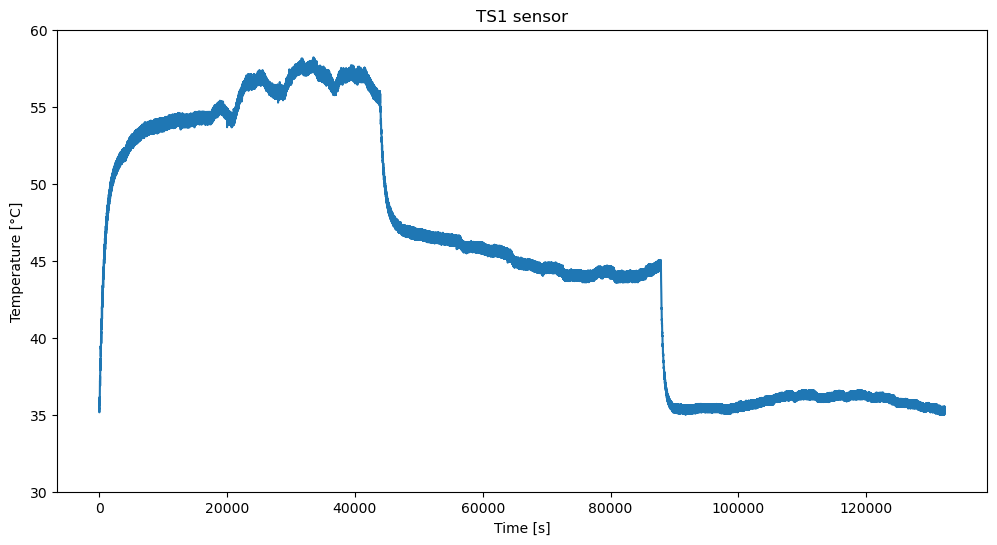

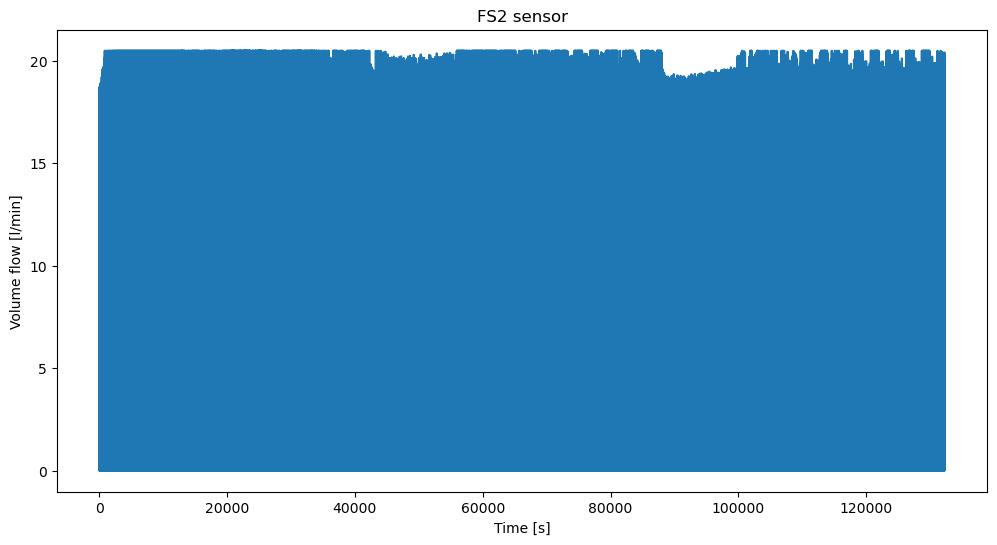

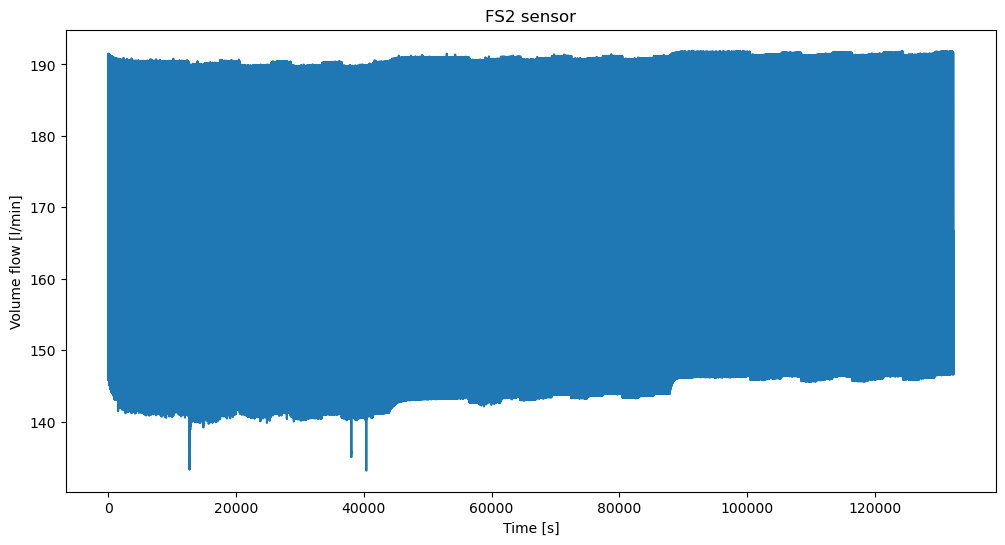

In [10]:
# Temperature (1 Hz)
t = np.linspace(0, X_1Hz.shape[0], num=len(X_1Hz))
t1 = np.linspace(0, X_1Hz.shape[0], num=len(X_1Hz[0:-1:100,3]))
plt.figure(figsize=(12,6))
plt.plot(t, X_1Hz[:,3])
# plt.plot(t1, X_1Hz[0:-1:100,3])
plt.xlabel('Time [s]')
plt.ylabel('Temperature [°C]')
plt.title('TS1 sensor')
plt.ylim(30,60)
plt.show
# print(X_1Hz[0:-1:100,3].shape)

# Volume Flow (10 Hz)
t = np.linspace(0, X_1Hz.shape[0], num=len(X_10Hz))
t1 = np.linspace(0, X_1Hz.shape[0], num=len(X_10Hz[0:-1:10,0]))
plt.figure(figsize=(12,6))
plt.plot(t, X_10Hz[:,0])
# plt.plot(t1, X_10Hz[0:-1:10,0])
plt.xlabel('Time [s]')
plt.ylabel('Volume flow [l/min]')
plt.title('FS2 sensor')
# plt.ylim(30,60)
plt.show
# print(X_10Hz[0:-1:10,0].shape)

# Volume Flow (100 Hz)
t = np.linspace(0, X_1Hz.shape[0], num=len(X_100Hz))
t1 = np.linspace(0, X_1Hz.shape[0], num=len(X_100Hz[0:-1:100,1]))
plt.figure(figsize=(12,6))
plt.plot(t, X_100Hz[:,1])
# plt.plot(t1, X_100Hz[0:-1:100,1])
plt.xlabel('Time [s]')
plt.ylabel('Volume flow [l/min]')
plt.title('FS2 sensor')
# plt.ylim(30,60)
plt.show
# print(X_100Hz[0:-1:100,1].shape)

In [78]:
### This is a way to increment the num
# import os
# # Data of 1Hz
# arr = os.listdir('data/1Hz')

# temp = np.loadtxt('data/1Hz/'+arr[0], delimiter='\t', skiprows=0, dtype=float)
# temp = temp.flatten()
# temp_ = np.asarray([])
# for ii in range(len(temp)):
#     for jj in range(100):
#         temp_ = np.append(temp_, temp[ii])

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

CE = 'data/CE.txt'
data_CE = np.loadtxt(CE, delimiter='\t', skiprows=0, dtype=float)
#print(data_CE)
CE_list = data_CE.tolist()
x = range(60)
for enti in CE_list:
  plt.plot(x,enti)
# Create the plot
#plt.plot(x, CE_list)
plt.xlabel('Instances')
plt.ylabel('Cooling efficiency [%]')
plt.title('CE sensor')
plt.show()

CE = 'data/CE.txt'
data_CE = np.loadtxt(CE, delimiter='\t', skiprows=0, dtype=float)
print(f"data_CE: {data_CE}")
data_CE = data_CE.flatten()
print(f"list: {data_CE}")
print(data_CE)
# Create x-axis values (assuming one value for each entry in the list)
x = range(132300)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, data_CE)
plt.xlabel('Instances')
plt.ylabel('Cooling power [kW]')
plt.title('CE sensor')
plt.ylim(0,70)
plt.show

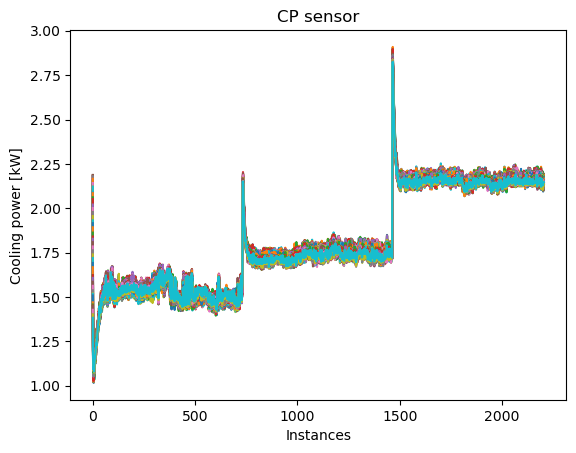

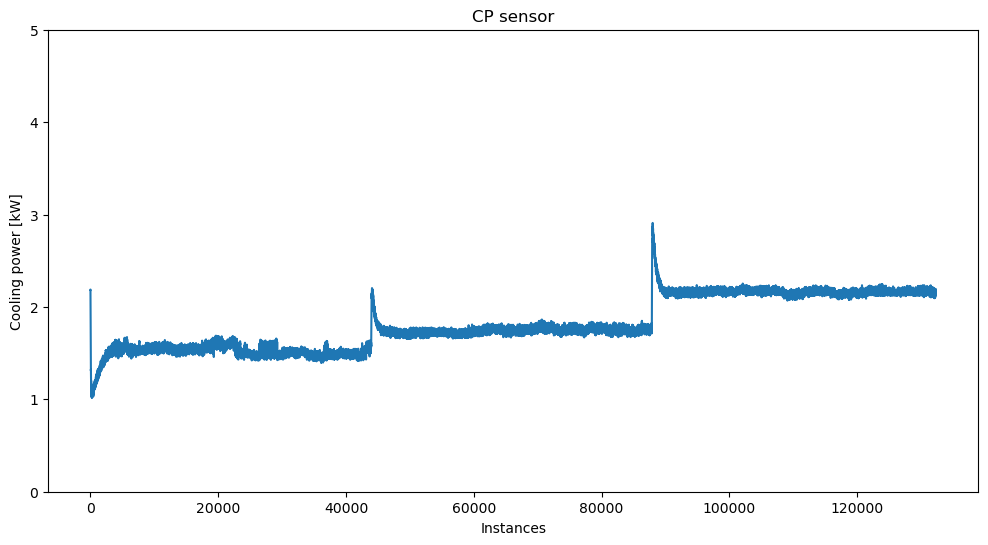

In [2]:
CP = 'data/CP.txt'
data_CP = np.loadtxt(CP, delimiter='\t', skiprows=0, dtype=float)
#print(data_CP)
CP_list = data_CP.tolist()
#print(CP_list)
#print(len(CP_list))
# Create x-axis values (assuming one value for each entry in the list)
x = range(2205)
# Create the plot
plt.plot(x, CP_list)
plt.xlabel('Instances')
plt.ylabel('Cooling power [kW]')
plt.title('CP sensor')
plt.show()

CP = 'data/CP.txt'
data_CP = np.loadtxt(CP, delimiter='\t', skiprows=0, dtype=float)
#print(data_CP)
CP_list = data_CP.flatten()
#print(CP_list)
# Create x-axis values (assuming one value for each entry in the list)
x = range(132300)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, CP_list)
plt.xlabel('Instances')
plt.ylabel('Cooling power [kW]')
plt.title('CP sensor')
plt.ylim(0,5)
plt.show()

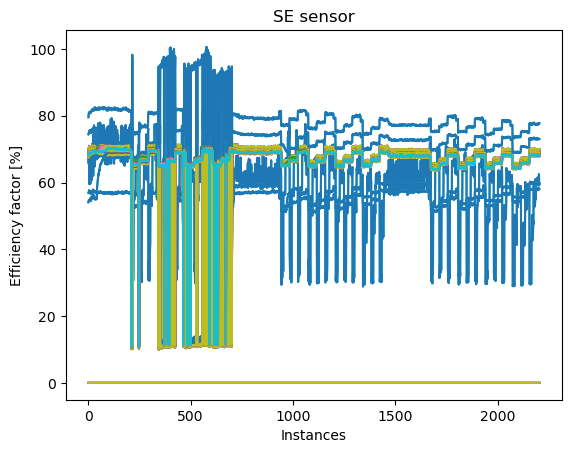

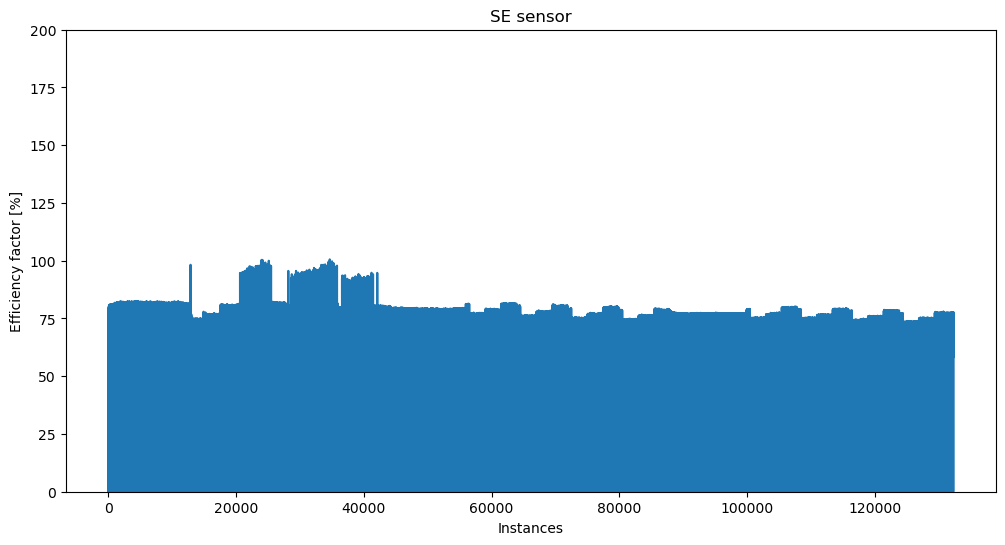

In [3]:
SE = 'data/SE.txt'
data_SE = np.loadtxt(SE, delimiter='\t', skiprows=0, dtype=float)
#print(data_CP)
SE_list = data_SE.tolist()
#print(CP_list)
#print(len(CP_list))
# Create x-axis values (assuming one value for each entry in the list)
x = range(2205)
# Create the plot
plt.plot(x, SE_list)
plt.xlabel('Instances')
plt.ylabel('Efficiency factor [%]')
plt.title('SE sensor')
plt.show()


SE = 'data/SE.txt'
data_SE = np.loadtxt(SE, delimiter='\t', skiprows=0, dtype=float)
#print(data_SE)

SE_list = data_SE.flatten()
#print(SE_list)
# Create x-axis values (assuming one value for each entry in the list)
x = range(132300)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, SE_list)
plt.xlabel('Instances')
plt.ylabel('Efficiency factor [%]')
plt.title('SE sensor')
plt.ylim(0,200)
plt.show()

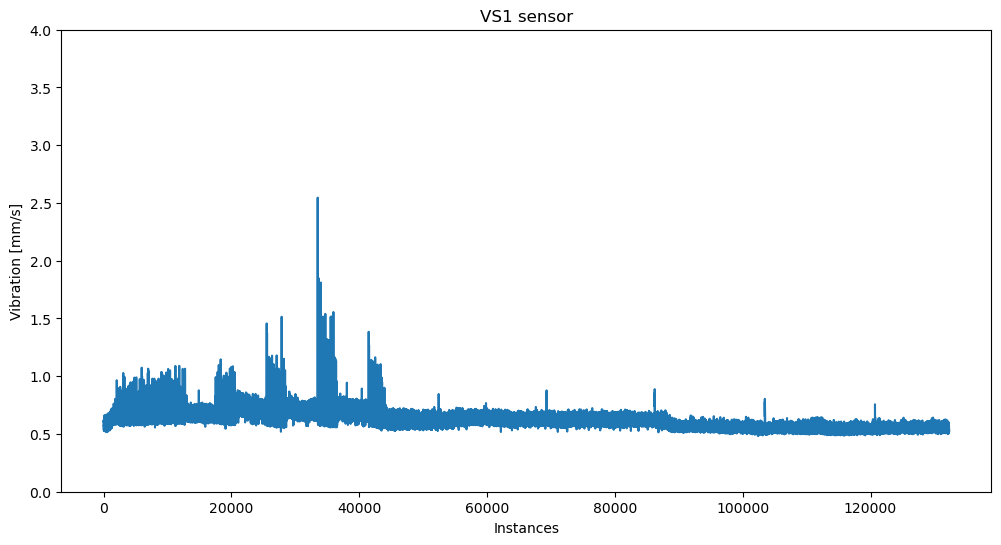

In [4]:
VS1 = 'data/VS1.txt'
data_VS1 = np.loadtxt(VS1, delimiter='\t', skiprows=0, dtype=float)
#print(data_VS1)

VS1_list = data_VS1.flatten()
#print(VS1_list)
# Create x-axis values (assuming one value for each entry in the list)
x = range(132300)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, VS1_list)
plt.xlabel('Instances')
plt.ylabel('Vibration [mm/s]')
plt.title('VS1 sensor')
plt.ylim(0,4)
plt.show()

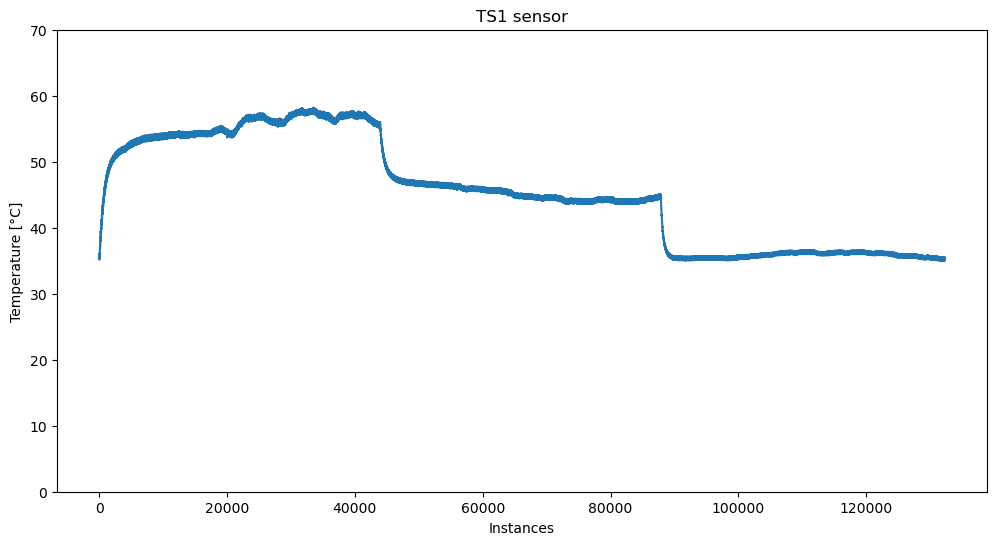

In [5]:
TS1 = 'data/TS1.txt'
data_TS1 = np.loadtxt(TS1, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS1)

TS1_list = data_TS1.flatten()
#print(TS1_list)
# Create x-axis values (assuming one value for each entry in the list)
x = range(132300)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, TS1_list)
plt.xlabel('Instances')
plt.ylabel('Temperature [°C]')
plt.title('TS1 sensor')
plt.ylim(0,70)
plt.show()

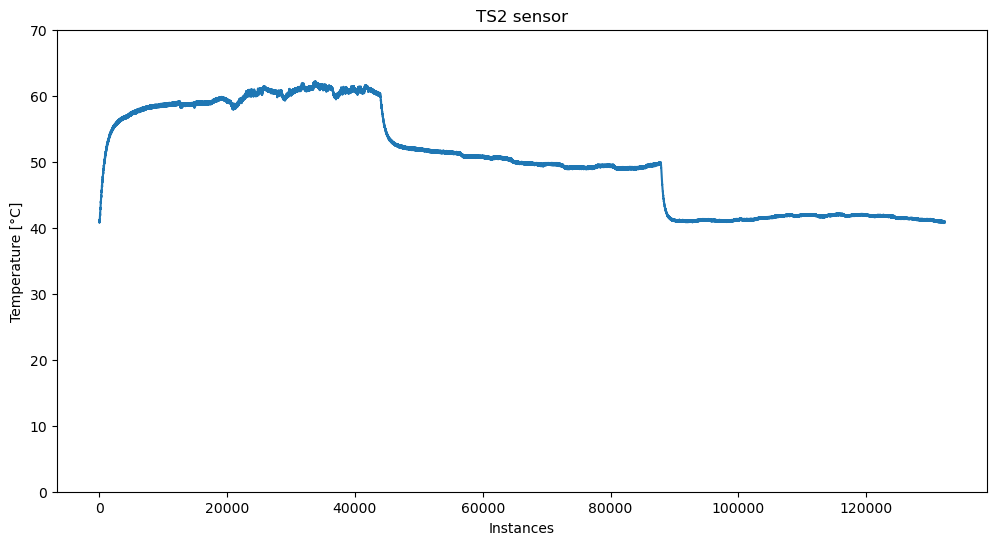

In [6]:
TS2 = 'data/TS2.txt'
data_TS2 = np.loadtxt(TS2, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS2)

TS2_list = data_TS2.flatten()
#print(TS2_list)
# Create x-axis values (assuming one value for each entry in the list)
x = range(132300)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, TS2_list)
plt.xlabel('Instances')
plt.ylabel('Temperature [°C]')
plt.title('TS2 sensor')
plt.ylim(0,70)
plt.show()

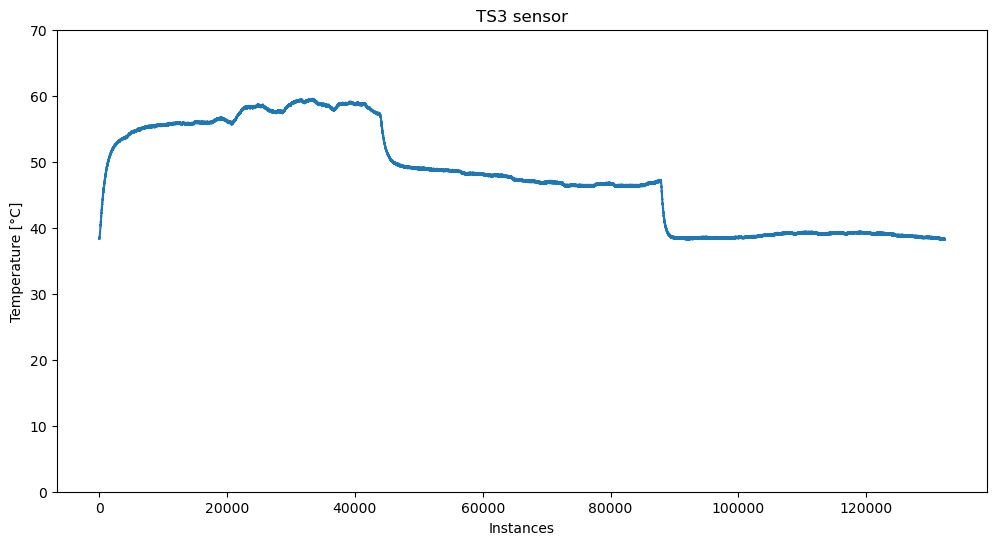

In [7]:
TS3 = 'data/TS3.txt'
data_TS3 = np.loadtxt(TS3, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS3)

TS3_list = data_TS3.flatten()
#print(TS3_list)
# Create x-axis values (assuming one value for each entry in the list)
x = range(132300)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, TS3_list)
plt.xlabel('Instances')
plt.ylabel('Temperature [°C]')
plt.title('TS3 sensor')
plt.ylim(0,70)
plt.show()

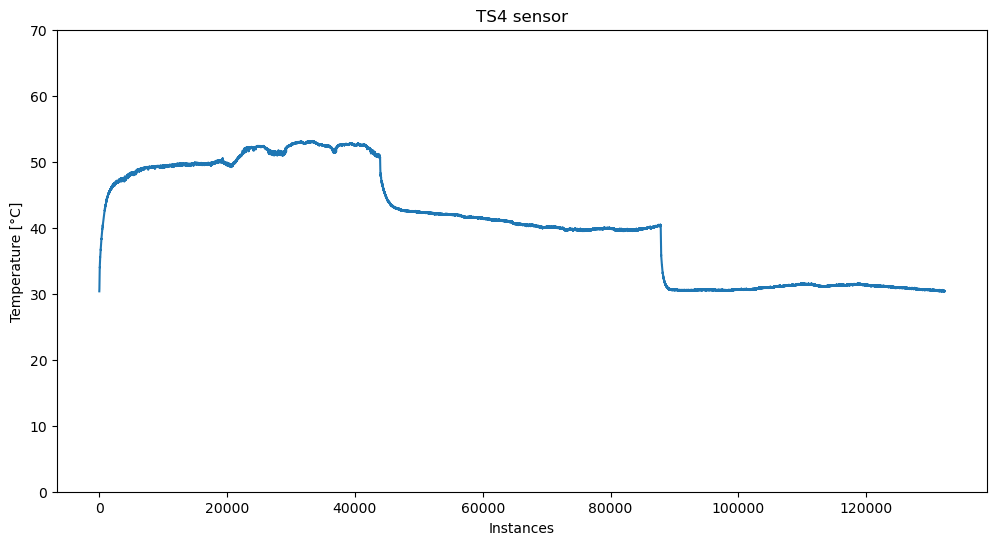

In [8]:
TS4 = 'data/TS4.txt'
data_TS4 = np.loadtxt(TS4, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS4)

TS4_list = data_TS4.flatten()
#print(TS4_list)
# Create x-axis values (assuming one value for each entry in the list)
x = range(132300)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, TS4_list)
plt.xlabel('Instances')
plt.ylabel('Temperature [°C]')
plt.title('TS4 sensor')
plt.ylim(0,70)
plt.show()

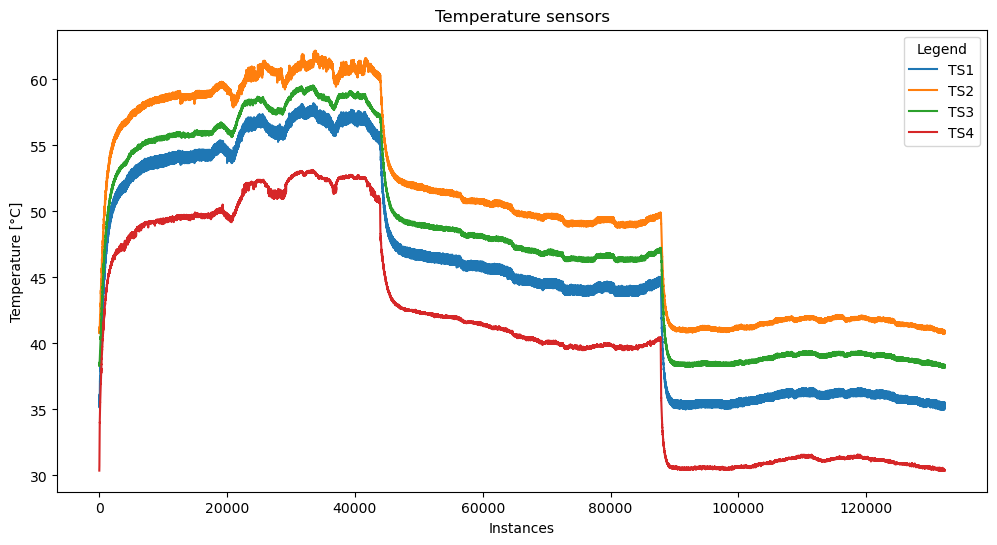

In [9]:
# Create the plot of all the temperature datasets
plt.figure(figsize=(12,6))
plt.plot(x, TS1_list)
plt.plot(x, TS2_list)
plt.plot(x, TS3_list)
plt.plot(x, TS4_list)
plt.xlabel('Instances')
plt.ylabel('Temperature [°C]')
plt.title('Temperature sensors')
legend = plt.legend(['TS1','TS2','TS3','TS4'], title = "Legend")
plt.show()

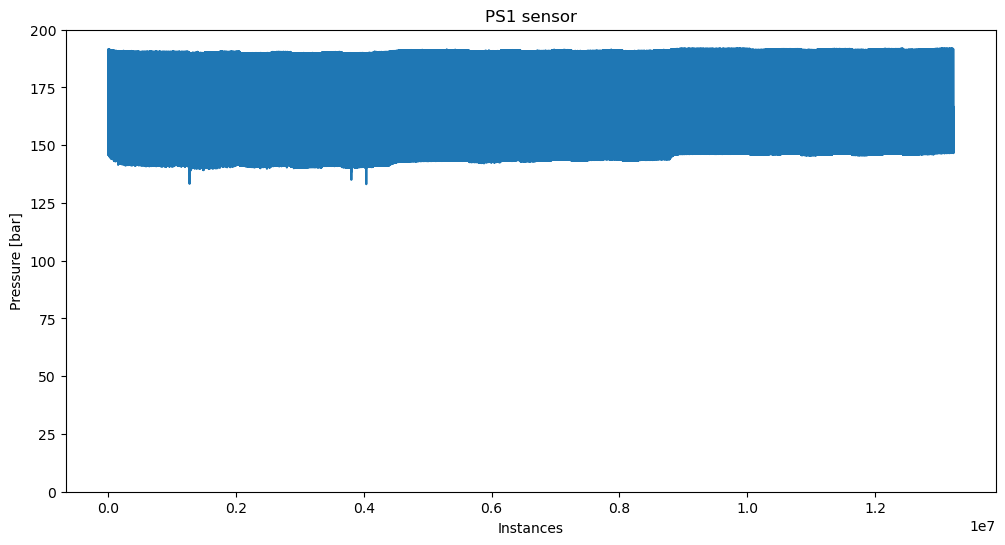

In [10]:
import numpy as np
import matplotlib.pyplot as plt

PS1 = 'data/PS1.txt'
data_PS1 = np.loadtxt(PS1, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS4)

PS1_list = data_PS1.flatten()
#print(PS1_list)
#print(len(PS1_list))
# Create x-axis values (assuming one value for each entry in the list)
x = range(13230000)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, PS1_list)
plt.xlabel('Instances')
plt.ylabel('Pressure [bar]')
plt.title('PS1 sensor')
plt.ylim(0,200)
plt.show()

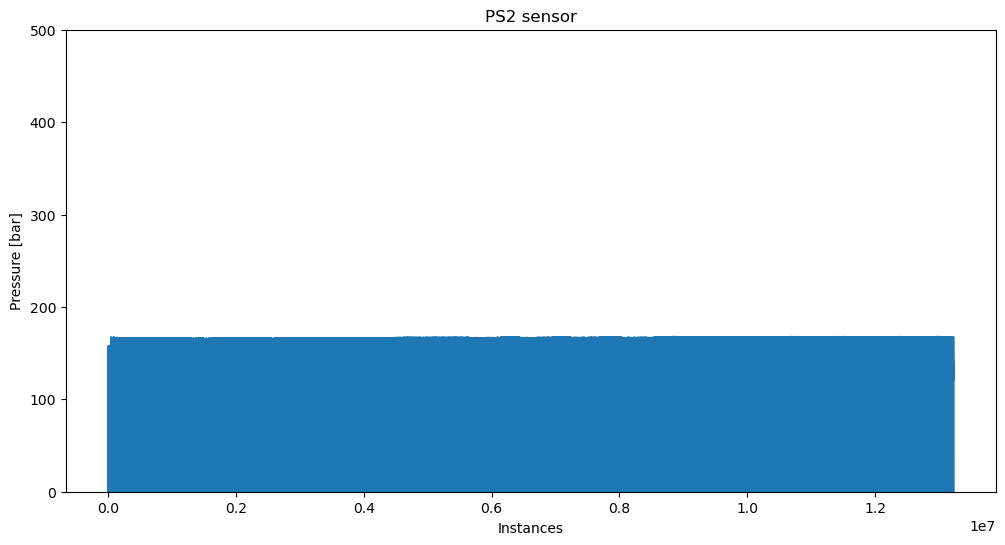

In [11]:
PS2 = 'data/PS2.txt'
data_PS2 = np.loadtxt(PS2, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS4)

PS2_list = data_PS2.flatten()
#print(PS1_list)
#print(len(PS1_list))
# Create x-axis values (assuming one value for each entry in the list)
x = range(13230000)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, PS2_list)
plt.xlabel('Instances')
plt.ylabel('Pressure [bar]')
plt.title('PS2 sensor')
plt.ylim(0,500)
plt.show()

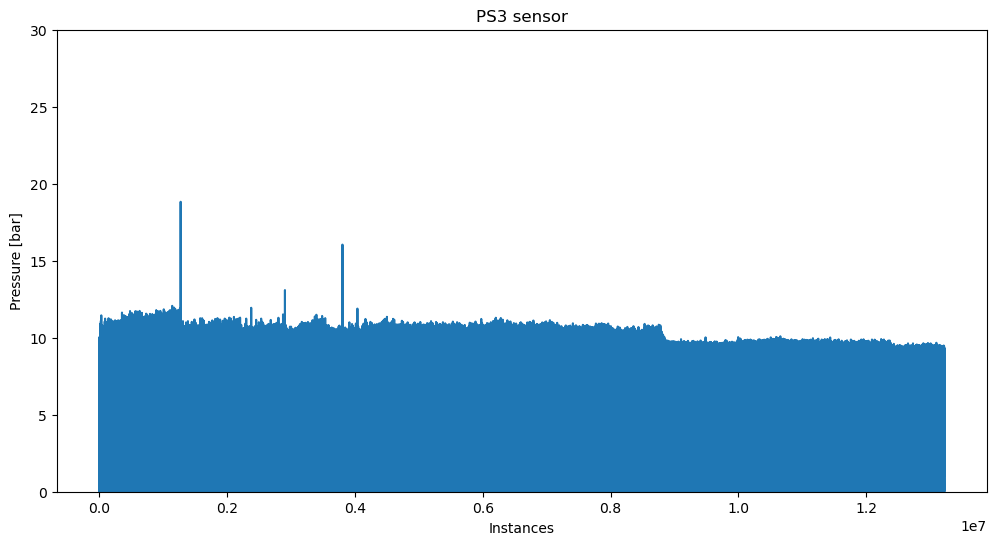

In [12]:
PS3 = 'data/PS3.txt'
data_PS3 = np.loadtxt(PS3, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS4)

PS3_list = data_PS3.flatten()
#print(PS1_list)
#print(len(PS1_list))
# Create x-axis values (assuming one value for each entry in the list)
x = range(13230000)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, PS3_list)
plt.xlabel('Instances')
plt.ylabel('Pressure [bar]')
plt.title('PS3 sensor')
plt.ylim(0,30)
plt.show()

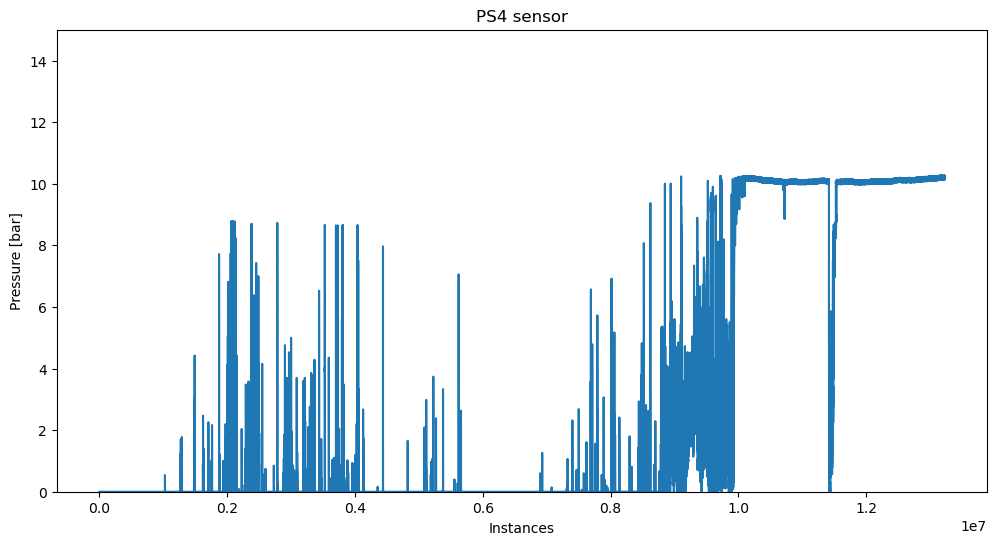

In [13]:
PS4 = 'data/PS4.txt'
data_PS4 = np.loadtxt(PS4, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS4)

PS4_list = data_PS4.flatten()
#print(PS1_list)
#print(len(PS1_list))
# Create x-axis values (assuming one value for each entry in the list)
x = range(13230000)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, PS4_list)
plt.xlabel('Instances')
plt.ylabel('Pressure [bar]')
plt.title('PS4 sensor')
plt.ylim(0,15)
plt.show()

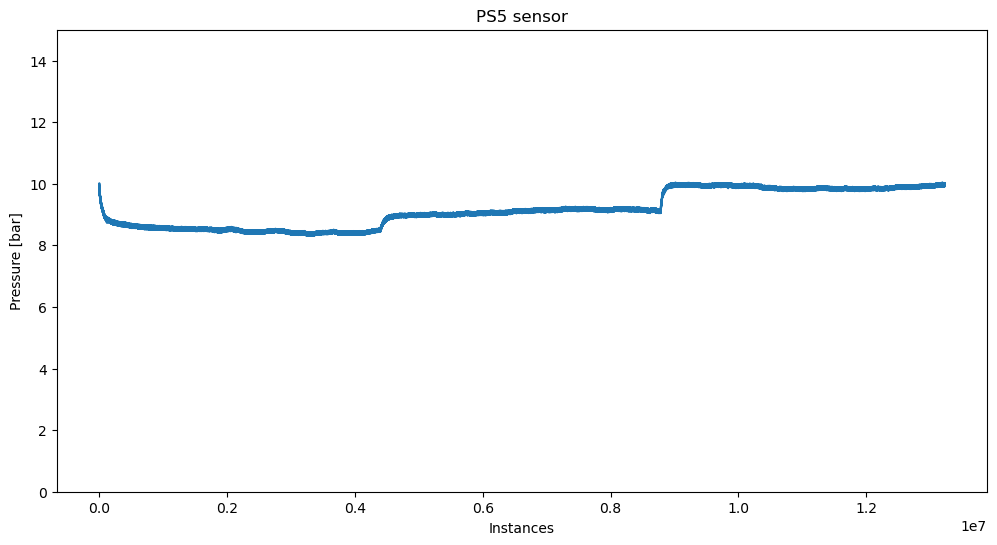

In [14]:
PS5 = 'data/PS5.txt'
data_PS5 = np.loadtxt(PS5, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS4)

PS5_list = data_PS5.flatten()
#print(PS1_list)
#print(len(PS1_list))
# Create x-axis values (assuming one value for each entry in the list)
x = range(13230000)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, PS5_list)
plt.xlabel('Instances')
plt.ylabel('Pressure [bar]')
plt.title('PS5 sensor')
plt.ylim(0,15)
plt.show()

KeyboardInterrupt: 

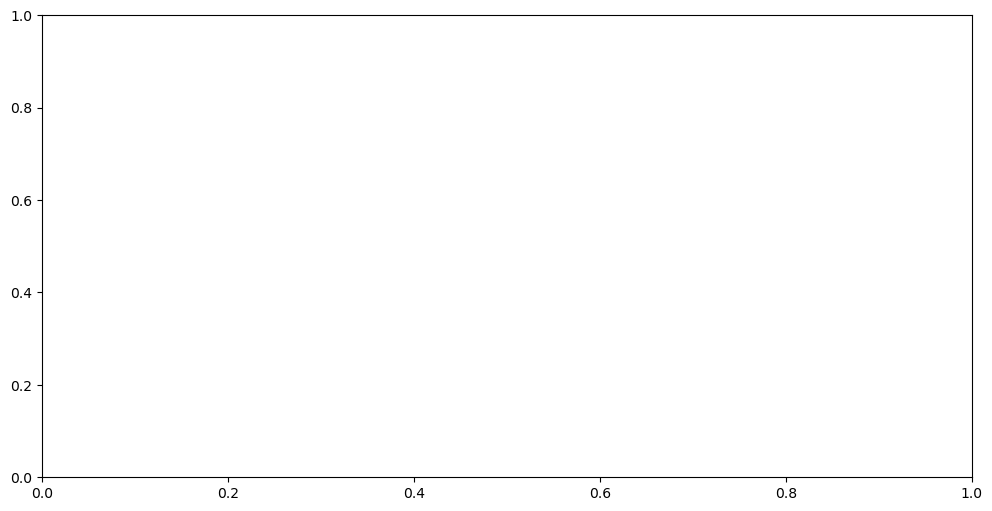

In [15]:
PS6 = 'data/PS6.txt'
data_PS6 = np.loadtxt(PS6, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS4)

PS6_list = data_PS6.flatten()
#print(PS1_list)
#print(len(PS1_list))
# Create x-axis values (assuming one value for each entry in the list)
x = range(13230000)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, PS6_list)
plt.xlabel('Instances')
plt.ylabel('Pressure [bar]')
plt.title('PS6 sensor')
plt.ylim(0,15)
plt.show()

In [ ]:
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, PS1_list)
plt.plot(x, PS2_list)
plt.plot(x, PS3_list)
plt.plot(x, PS4_list)
plt.plot(x, PS5_list)
plt.plot(x, PS6_list)
plt.xlabel('Instances')
plt.ylabel('Pressure [bar]')
plt.title('Pression sensors')
legend = plt.legend(['PS1','PS2','PS3','PS4','PS5','PS6'], title = "Legend")
plt.ylim(0,400)
plt.show()

In [ ]:
EPS1 = 'data/EPS1.txt'
data_EPS1 = np.loadtxt(EPS1, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS4)

EPS1_list = data_EPS1.flatten()
#print(PS1_list)
#print(len(PS1_list))
# Create x-axis values (assuming one value for each entry in the list)
x = range(13230000)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, EPS1_list)
plt.xlabel('Instances')
plt.ylabel('Motor Power [W]')
plt.title('EPS1 sensor')
plt.show()

In [ ]:
FS1 = 'data/FS1.txt'
data_FS1 = np.loadtxt(FS1, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS4)

FS1_list = data_FS1.flatten()
#print(PS1_list)
#print(len(PS1_list))
# Create x-axis values (assuming one value for each entry in the list)
x = range(1323000)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, FS1_list)
plt.xlabel('Instances')
plt.ylabel('Volume flow [l/min]')
plt.title('FS1 sensor')
plt.show()

In [ ]:
FS2 = 'data/FS2.txt'
data_FS2 = np.loadtxt(FS2, delimiter='\t', skiprows=0, dtype=float)
#print(data_TS4)

FS2_list = data_FS2.flatten()
#print(PS1_list)
#print(len(PS1_list))
# Create x-axis values (assuming one value for each entry in the list)
x = range(1323000)
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, FS2_list)
plt.xlabel('Instances')
plt.ylabel('Volume flow [l/min]')
plt.title('FS2 sensor')
plt.show()

In [ ]:
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, FS1_list)
plt.plot(x, FS2_list)
plt.xlabel('Instances')
plt.ylabel('Volume flow [l/min]')
plt.title('Volume Flow sensora')
legend = plt.legend(['FS1','FS2'], title = "Legend")
plt.show()

# **Gcastle ToolBox**
Library installation

In [ ]:
!pip install gcastle==1.0.3

First case: DAG-GNN

It is a structure learning that utilizes neural networks. At the heart of the DAG-GNN model there is a variational autoencoder parametrized by graph neural network.

DAG-GNN refers to Directed Acyclic Graph - Graph Neural Network. It is a type of graph neural network specifically designed to model and analyze directed acyclic graphs.

In DAG-GNN, the nodes in the graph represent entities or variables, and the edges represent causal relationships between them. The network aims to learn the underlying causal structure of the graph by capturing the dependencies and interactions between the variables.

The architecture of DAG-GNN typically involves message passing and aggregation mechanisms to propagate information between nodes in the graph. It leverages graph neural network techniques to update the node representations based on the neighborhood information and captures the causal relationships in the graph.

The learning process in DAG-GNN involves training the network on labeled or observed data to infer the causal structure. It often involves optimization techniques, such as backpropagation, to update the network parameters based on the prediction error or loss function.

DAG-GNN has applications in various domains, such as causal inference, causal discovery, and understanding complex systems with causal relationships. It can be used to analyze and make predictions based on causal dependencies in domains like healthcare, finance, social networks, and more.

In the following DAG-GNN is implemented using Gcastle ToolBox and the obtained causal graph adjacency matrix is displayed.


In [ ]:
import os
os.environ['CASTLE_BACKEND'] = 'pytorch'
from castle.common import GraphDAG
from castle.algorithms import DAG_GNN
import pandas as pd
import numpy as np

rows = 132300
cols = 8
matrix = np.zeros((rows, cols))
matrix[:, 0] = TS1_list.T
matrix[:,1] = TS2_list.T
matrix[:,2] = TS3_list.T
matrix[:,3] = TS4_list.T
matrix[:,4] = VS1_list.T
matrix[:,5] = CE_list.T
matrix[:,6] = CP_list.T
matrix[:,7] = SE_list.T
print(matrix)

# rl learn
gnn = DAG_GNN(device_type='cpu')
gnn.learn(matrix)
# plot dag
GraphDAG(gnn.causal_matrix)

# **Bibliography:**

[1] https://archive-beta.ics.uci.edu/dataset/447/condition+monitoring+of+hydraulic+systems

[2] https://ieeexplore.ieee.org/document/7151267